In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler


In [ ]:
!pip install scikit-fuzzy




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 38.9 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv("/Banglore_traffic_Dataset.csv")

In [ ]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [ ]:
df=df.drop(['congestion_level'],axis=1)

In [ ]:
import skfuzzy as fuzz

In [ ]:
features=df[["Traffic Volume","Average Speed"]]
scaler= StandardScaler()
X_scaled=scaler.fit_transform(features).T


In [ ]:
n_clusters = 3  # e.g. Low, Medium, High congestion
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

In [ ]:
labels = np.argmax(u, axis=0)

In [ ]:
df['congestion_cluster'] = labels

In [ ]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,congestion_cluster
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,1
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,2
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,0
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,1
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,1


In [ ]:
cluster_map = {0: 'Low', 1: 'Medium', 2: 'High'}
df['congestion_level'] = df['congestion_cluster'].map(cluster_map)


In [ ]:
df.head()


,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,congestion_cluster
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,1
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,2
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,0
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,1
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,1


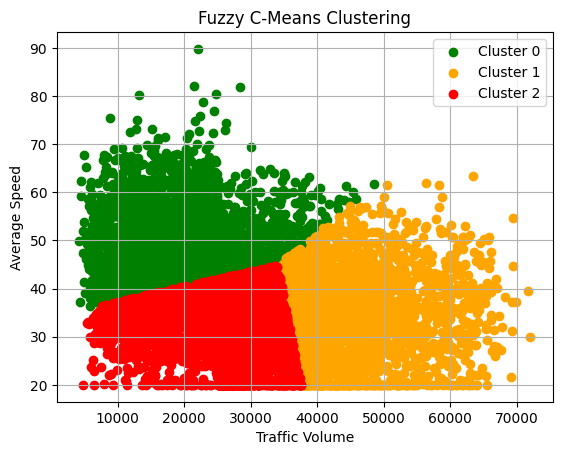

In [ ]:
# Plot
colors = ['green', 'orange', 'red']
for i in range(n_clusters):
    cluster_data = df[df['congestion_cluster'] == i]
    plt.scatter(cluster_data['Traffic Volume'], cluster_data['Average Speed'],
                label=f'Cluster {i}', color=colors[i])

plt.xlabel("Traffic Volume")
plt.ylabel("Average Speed")
plt.title("Fuzzy C-Means Clustering")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
cluster_map = {
    0: 'Low',
    1: 'Medium',
    2: 'High'
}
df['congestion_level'] = df['congestion_cluster'].map(cluster_map)


In [ ]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,congestion_cluster,congestion_level
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,1,Medium
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,2,High
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,0,Low
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,1,Medium
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,1,Medium


In [ ]:
membership_df = pd.DataFrame(u.T, columns=[f'cluster_{i}_prob' for i in range(n_clusters)])

In [ ]:
df_soft = pd.concat([df.reset_index(drop=True), membership_df], axis=1)

In [ ]:
df_soft.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,congestion_cluster,congestion_level,cluster_0_prob,cluster_1_prob,cluster_2_prob
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,1,Medium,0.219555,0.564398,0.216047
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,2,High,0.041609,0.134529,0.823862
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,0,Low,0.800017,0.069826,0.130157
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,1,Medium,0.142961,0.665730,0.191310
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,1,Medium,0.103987,0.738489,0.157524


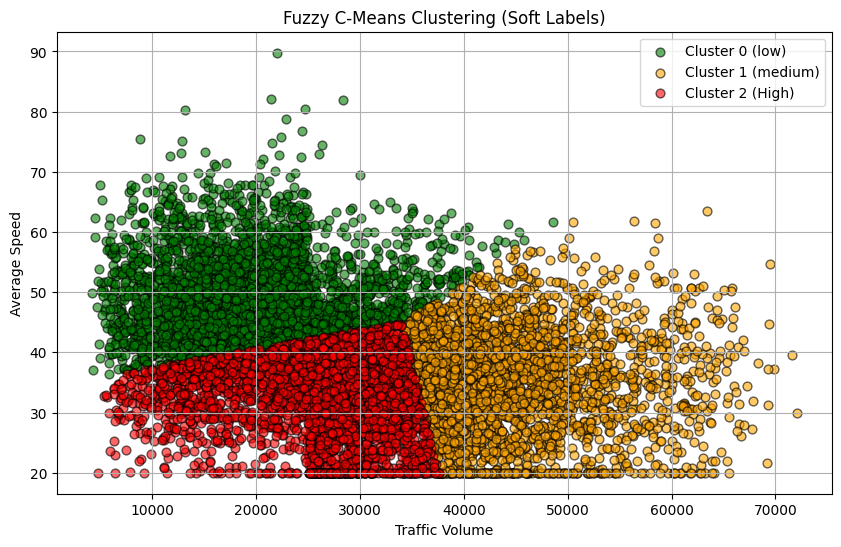

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Get most likely cluster (fuzzy label)
membership_cols = [f'cluster_{i}_prob' for i in range(n_clusters)]
df_soft['fuzzy_label'] = df_soft[membership_cols].idxmax(axis=1).str.extract('(\d+)').astype(int)

# Step 2: Also get max probability for color intensity / transparency
df_soft['max_prob'] = df_soft[membership_cols].max(axis=1)

# Step 3: Define cluster colors (same as before)
cluster_colors = {0: 'green', 1: 'orange', 2: 'red'}
cluster_names = {0: 'low', 1: 'medium', 2: 'High'}

# Step 4: Plot
plt.figure(figsize=(10, 6))

for cluster in range(n_clusters):
    cluster_data = df_soft[df_soft['fuzzy_label'] == cluster]
    plt.scatter(
        cluster_data['Traffic Volume'], cluster_data['Average Speed'],
        c=cluster_colors[cluster],
        label=f"Cluster {cluster} ({cluster_names[cluster]})",
        alpha=0.6,
        edgecolor='k',
        s=40
    )

plt.title("Fuzzy C-Means Clustering (Soft Labels)")
plt.xlabel("Traffic Volume")
plt.ylabel("Average Speed")
plt.legend()
plt.grid(True)
plt.show()
